# Summary
This is one of the two complementary forecasting tasks to predict COVID-19 spread.<p>
Perid:March 25 and April 22 by region<p>
Taget:Global forecasting confirmed cases and fatalities<p>
*The primary goal isn't to produce accurate forecasts. 

1. 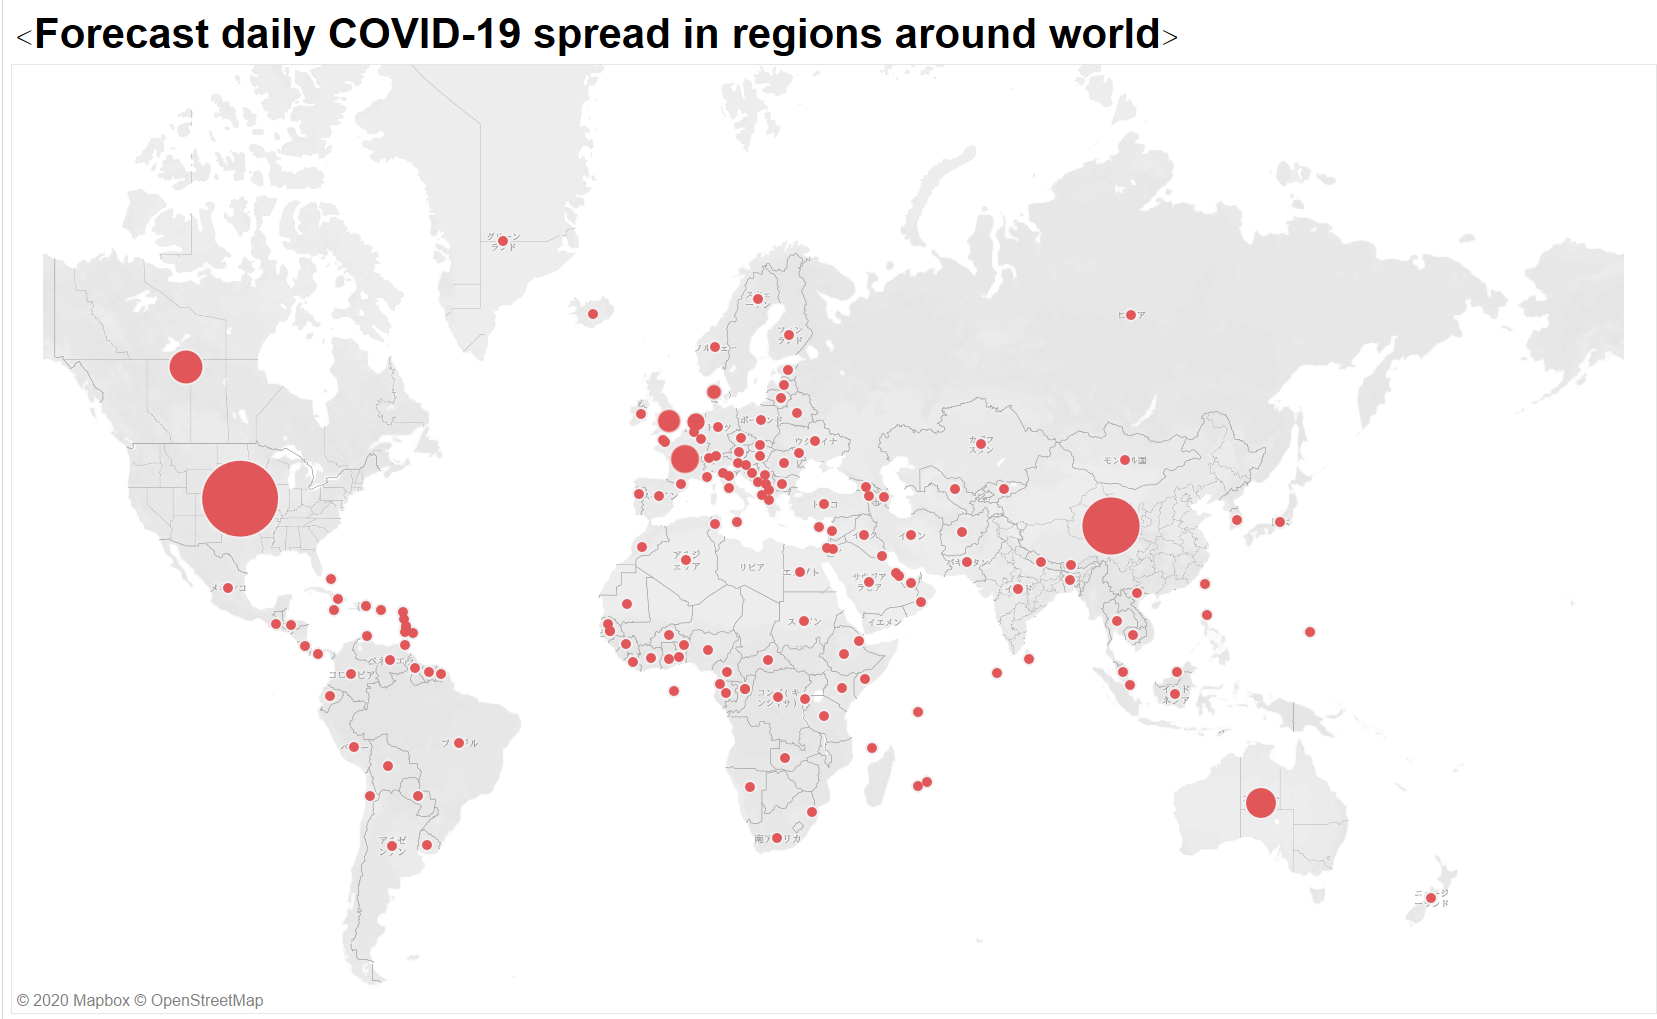

Algorithm considerations

There are several ways to output other labels in regression prediction.

Idea 1. Adopt Regressor which originally 
This is simple.Scikit-learn's RandomForest is typical, but there are some that originally support other label output.
If this is used, it is okay to give data with multiple labels as learning data.

Idea 2. Using a neural network
Since the number of hidden layers and output layers can be changed in a neural network, multi-label output is possible by changing the number of output layers.

Idea 3. Using MultiOutputRegressor of scikit-learn
If you use this, you can also output Regressor that does not support multi-label output

This time, we use Idea3, which has few Notebooks.

#  1.Import

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from pandas_profiling import ProfileReport

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#  2.Read data

In [ ]:
train = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-1/train.csv')
test = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-1/test.csv')
submission = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-1/submission.csv')

#  3.EDA
Pandas-profiling performs exploratory data analysis with a single line of code. 
The following are mainly organized: Statistics, histograms, occurrences.

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
submission

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
train_profile = ProfileReport(train, title='Pandas Profiling Report', html={'style':{'full_width':True}})
train_profile

In [ ]:
test_profile = ProfileReport(test, title='Pandas Profiling Report', html={'style':{'full_width':True}})
test_profile

ProfileReport takes a long time to execute.

Train Summary
Data shape **16188**

Country/Region
Distinct count	**163**


When arranged in descending order<p>
US	: **2494** <p>
China :	 **1419** <p>
Canada :	 **473** <p>
Australia :	 **387** <p>
France :	**344** <p>  other

#### 4.Predict

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

#for_modeling
import lightgbm as lgb

#for_plot
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
import gc

 ##　Time series processing

In [ ]:
train['month'] = train['Date'].str.extract(r'[0-9]+[-]([0-9]+)[-]')
train['day'] = train['Date'].str.extract(r'[0-9]+[-][0-9]+[-]([0-9]+)')
train = train.drop('Date', axis = 1)

test['month'] = test['Date'].str.extract(r'[0-9]+[-]([0-9]+)[-]')
test['day'] = test['Date'].str.extract(r'[0-9]+[-][0-9]+[-]([0-9]+)')
test = test.drop('Date', axis = 1)

Time series data will be digitized so that LGBM can process it.

In [ ]:
def get_seed(x):
    return int(x[0:2])
train['month'] = train['month'].map(lambda x: get_seed(x))
train['day'] = train['day'].map(lambda x: get_seed(x))


def get_seed(x):
    return int(x[0:2])
test['month'] = test['month'].map(lambda x: get_seed(x))
test['day'] = test['day'].map(lambda x: get_seed(x))

In [ ]:
x_train_drop = train.drop(['Province/State','Country/Region','ConfirmedCases','Fatalities'],axis=1)
y_train_drop = train.drop(['Province/State','Country/Region','Id','Province/State','Country/Region','Lat','Long','month','day'],axis=1)

In [ ]:
test_drop = test.drop(['Province/State','Country/Region'],axis=1)

In [ ]:
x_train_drop

In [ ]:
y_train_drop

# 4.Predict (lightgbm/MultiOutputRegressor)

In [ ]:
import lightgbm as lgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import numpy as np

In [ ]:
import lightgbm as lgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.multioutput import MultiOutputRegressor


import numpy as np

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_train_drop, y_train_drop)

# Train the model with the above parameters
# model = MultiOutputRegressor(lgb.LGBMRegressor()) #def
model = MultiOutputRegressor(lgb.LGBMRegressor(num_leaves=100, max_depth=-1,n_estimators=200,learning_rate=0.01))
model.fit(X_train, y_train)


# Predict divided learning data
y_pred = []
y_pred = model.predict(X_test)

# RMSE 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

In [ ]:
# testdata Precict
submission_pred = []
submission_pred = model.predict(test_drop)

In [ ]:
submission_drop = submission.drop(['ConfirmedCases','Fatalities'],axis=1)

In [ ]:
import pandas as pd
from pandas import Series, DataFrame

In [ ]:
submission_drop_df = DataFrame(submission_drop)
submission_pred_df = DataFrame(submission_pred)

In [ ]:
submission_pred_df.columns = ['ConfirmedCases', 'Fatalities']
submission_pred_df

In [ ]:
submission_df = pd.merge(submission_drop_df, submission_pred_df,left_index=True,right_index=True)
submission_df

In [ ]:
submission_df.to_csv("submission.csv", index=False)

Thank you for watching.
If you like it, please "UPVOTE". I am very encouraged. Let's all look forward to Kaggle!